# Pyddm
## &copy;  [Omkar Mehta](omehta2@illinois.edu) ##
### Industrial and Enterprise Systems Engineering, The Grainger College of Engineering,  UIUC ###

<hr style="border:2px solid blue"> </hr>


PyDDM can simulate models and generate artificial data, or it can fit them to data. Below are high-level overviews for how to accomplish each.

To simulate models and generate artificial data:

1. Optionally, define unique components of your model. Models are modular, and allow specifying a dynamic drift rate, noise level, diffusion bounds, starting position of the integrator, or post-simulation modifications to the RT histogram. Many common models for these are included by default, but for advance functionality you may need to subclass [Drift](https://pyddm.readthedocs.io/en/stable/apidoc/dependences.html#ddm.models.drift.Drift), [Noise](https://pyddm.readthedocs.io/en/stable/apidoc/dependences.html#ddm.models.noise.Noise), [Bound](https://pyddm.readthedocs.io/en/stable/apidoc/dependences.html#ddm.models.bound.Bound), [InitialCondition](https://pyddm.readthedocs.io/en/stable/apidoc/dependences.html#ddm.models.ic.InitialCondition), or [Overlay](https://pyddm.readthedocs.io/en/stable/apidoc/dependences.html#ddm.models.overlay.Overlay). These model components may depend on “conditions”, i.e. prespecified values associated with the behavioral task which change from trial to trial (e.g. stimulus coherence), or “parameters”, i.e. values which apply to all trials and should be fit to the subject.
2. Define a model. Models are represented by creating an instance of the [Model](https://pyddm.readthedocs.io/en/stable/apidoc/model.html#ddm.model.Model) class, and specifying the model components to use for it. These model component can [either be the model components included in PyDDM](https://pyddm.readthedocs.io/en/stable/apidoc/dependences.html) or ones you created in step 1. Values must be specified for all parameters required by model components.
3. Simulate the model using the [Model.solve()](https://pyddm.readthedocs.io/en/stable/apidoc/model.html#ddm.model.Model.solve) method to generate a [Solution](https://pyddm.readthedocs.io/en/stable/apidoc/model.html#ddm.solution.Solution) object. If you have multiple conditions, you must run [Model.solve()](https://pyddm.readthedocs.io/en/stable/apidoc/model.html#ddm.model.Model.solve) separately for each set of conditions and generate separate [Solution](https://pyddm.readthedocs.io/en/stable/apidoc/model.html#ddm.solution.Solution) objects.
4. Run the [Solution.resample()](https://pyddm.readthedocs.io/en/stable/apidoc/model.html#ddm.solution.Solution.resample) method of the [Solution](https://pyddm.readthedocs.io/en/stable/apidoc/model.html#ddm.solution.Solution) object to generate a [Sample](https://pyddm.readthedocs.io/en/stable/apidoc/model.html#ddm.sample.Sample). If you have multiple [Solution](https://pyddm.readthedocs.io/en/stable/apidoc/model.html#ddm.solution.Solution) objects (for multiple task conditions), you will need to generate multiple [Sample](https://pyddm.readthedocs.io/en/stable/apidoc/model.html#ddm.sample.Sample) objects as well. These can be added together with the “+” operator to form one single [Sample](https://pyddm.readthedocs.io/en/stable/apidoc/model.html#ddm.sample.Sample) object.

## Model with default conditions

**Drift is 0 and Noise is constant.**
```
> dx = 0.005
> T_dur = 2.
> dt = 0.005
> drift=DriftConstant(drift=0),
> noise=NoiseConstant(noise=1),
> bound=BoundConstant(B=1),
> IC=ICPointSourceCenter(),
> overlay=OverlayNone()
```

In [1]:
# !pip install scipy
# !pip install numpy
# !pip install pyddm
# !pip install matplotlib
# !pip install pandas
# !pip install paranoid-scientist
# !pip install pathos
# !pip install plotly

In [2]:
# libraries
from ddm import Model
from ddm.models import DriftConstant, NoiseConstant, BoundConstant, OverlayNonDecision, OverlayNone
from ddm.functions import fit_adjust_model, display_model

model = Model(name='Simple model',
              drift=DriftConstant(drift=2.0),  # https://github.com/mwshinn/PyDDM/blob/master/ddm/models/drift.py
              noise=NoiseConstant(noise=1.5),  # https://github.com/mwshinn/PyDDM/blob/master/ddm/models/noise.py
              bound=BoundConstant(B=1.1),  # https://github.com/mwshinn/PyDDM/blob/master/ddm/models/bound.py
              overlay=OverlayNone(),  # https://github.com/mwshinn/PyDDM/blob/master/ddm/models/overlay.py
              dx=.001, dt=.01, T_dur=2)


In [3]:
print(f'Number of timesteps is {2/0.01+1}')  # considers initial state
model.t_domain()
print(f"Shape of t_domain() is {model.t_domain().shape[0]}")
# print(f'Number of x_steps is {1.1/0.001+1}') since B=1.1
print(f'Number of x_steps is {model.x_domain(conditions={}).shape[0]}')

Number of timesteps is 201.0
Shape of t_domain() is 201
Number of x_steps is 2201


In [4]:
display_model(model)

Model Simple model information:
Drift component DriftConstant:
    constant
    Fixed parameters:
    - drift: 2.000000
Noise component NoiseConstant:
    constant
    Fixed parameters:
    - noise: 1.500000
Bound component BoundConstant:
    constant
    Fixed parameters:
    - B: 1.100000
IC component ICPointSourceCenter:
    point_source_center
    (No parameters)
Overlay component OverlayNone:
    No overlay
    (No parameters)



In [5]:
# # simulate_trial() simulates decision variable for a single trial. Uses Runge-Kutta by default.
# model.simulate_trial()

# simulated_solution() simulate individual trials (simulate_trial) 1000 times by default to yield a histogram.
# model.simulated_solution() 

In [6]:
# solve() solves the model using an analytical solution and returns a Solution object describing the joing PDF distrobution of reaction times
sol = model.solve(return_evolution=True)

# stores the pdf evolution of the reaction times. Returns x_domain by t_domain numpy error
pdf_evol = sol.pdf_evolution()
# print(f'Number of x_steps is {1.1/0.001+1}') since B=1.1
pdf_evol.shape
# returns the pdf of correct reaction times
# len(sol.pdf_corr())

# print(sol.corr)

# print('\n')

# print(sol.pdf_corr())

(2201, 201)

In [7]:
pdf_evol

array([[0.00000000e+00, 9.91081419e-07, 5.12110809e-06, ...,
        9.93100445e-07, 9.62504415e-07, 9.32851006e-07],
       [0.00000000e+00, 1.98401450e-06, 1.02516959e-05, ...,
        1.98796516e-06, 1.92671875e-06, 1.86735925e-06],
       [0.00000000e+00, 2.97889088e-06, 1.53921485e-05, ...,
        2.98459448e-06, 2.89264332e-06, 2.80352504e-06],
       ...,
       [0.00000000e+00, 2.09796214e-05, 1.08403248e-04, ...,
        2.10197905e-05, 2.03722003e-05, 1.97445614e-05],
       [0.00000000e+00, 1.39978061e-05, 7.23287313e-05, ...,
        1.40256792e-05, 1.35935677e-05, 1.31747690e-05],
       [0.00000000e+00, 7.00481298e-06, 3.61952144e-05, ...,
        7.01908315e-06, 6.80283505e-06, 6.59324926e-06]])

## Plot PDF evolution using Plotly


In [8]:
# import plotly.graph_objects as go
# import numpy as np
# z=pdf_evol
# sh_0, sh_1 = z.shape
# x, y = np.linspace(0, 2.2, sh_0), np.linspace(0, 2, sh_1)
# fig = go.Figure(data=[go.Surface(z=z.T, x=x, y=y)])

# fig.update_layout(title='PDF Evolution', autosize=False,
#                   width=500, height=500,
#                   margin=dict(l=65, r=50, b=65, t=90))

# fig.show()


## Wiener process/Brownian motion

A standard scalar [Wiener process](https://en.wikipedia.org/wiki/Wiener_process) is generated by the [stochastic differential equation](https://en.wikipedia.org/wiki/Stochastic_differential_equation).

$$
dX_{t} = dW_{t}
$$

Here the drift term is zero and the diffusion coefficient is 1/2. Thus the corresponding Fokker–Planck equation is
$$
\frac{\partial p(x,t)}{\partial t} = \frac{1}{2} \frac{\partial^2 p(x,t)}{{\partial x}^{2}}
$$

which is the simplest form of a diffusion equation. If the initial condition is $ {\displaystyle p(x,0)=\delta (x)}$, the solution is
$$
p(x,t) = \frac{1}{\sqrt {2\pi t}} e^{-x^2/(2t)}
$$

In [9]:
# libraries
from ddm import Model
from ddm.models import DriftConstant, NoiseConstant, BoundConstant, OverlayNonDecision
from ddm.functions import fit_adjust_model, display_model
from ddm.models import ICUniform, ICGaussian, ICArbitrary, ICRange, ICPointSourceCenter

# Weiner process with ICUniform
model = Model(name='Weiner Process',
              drift=DriftConstant(drift=0.0),  # https://github.com/mwshinn/PyDDM/blob/master/ddm/models/drift.py
              noise=NoiseConstant(noise=0.5),  # https://github.com/mwshinn/PyDDM/blob/master/ddm/models/noise.py
              IC = ICUniform(),
              bound=BoundConstant(B=2),  # https://github.com/mwshinn/PyDDM/blob/master/ddm/models/bound.py
              overlay=OverlayNone(),  # https://github.com/mwshinn/PyDDM/blob/master/ddm/models/overlay.py
              dx=.001, dt=.01, T_dur=10)

print(f'Number of timesteps is {10/0.01+1}')  # considers initial state
model.t_domain()
print(f"Shape of t_domain() is {model.t_domain().shape[0]}")
# print(f'Number of x_steps is {1.1/0.001+1}') since B=1.1
print(f'Number of x_steps is {model.x_domain(conditions={}).shape[0]}')

print(display_model(model))

# solve() solves the model using an analytical solution and returns a Solution object describing the joing PDF distrobution of reaction times
sol = model.solve(return_evolution=True)

# stores the pdf evolution of the reaction times. Returns x_domain by t_domain numpy error
pdf_evol = sol.pdf_evolution()

# import plotly.graph_objects as go
# import numpy as np
# z=pdf_evol
# sh_0, sh_1 = z.shape
# x, y = np.linspace(-5, 5, sh_0), np.linspace(0, 10, sh_1)
# fig = go.Figure(data=[go.Surface(z=z.T, x=x, y=y)])

# fig.update_layout(title='PDF Evolution for Weiner Process', autosize=False,
#                   width=500, height=500,
#                   margin=dict(l=65, r=50, b=65, t=90))

# fig.show()


Number of timesteps is 1001.0
Shape of t_domain() is 1001
Number of x_steps is 4001
Model Weiner Process information:
Drift component DriftConstant:
    constant
    Fixed parameters:
    - drift: 0.000000
Noise component NoiseConstant:
    constant
    Fixed parameters:
    - noise: 0.500000
Bound component BoundConstant:
    constant
    Fixed parameters:
    - B: 2.000000
IC component ICUniform:
    Uniform
    (No parameters)
Overlay component OverlayNone:
    No overlay
    (No parameters)

None


## Ornstein–Uhlenbeck process

The Ornstein–Uhlenbeck process ${\displaystyle x_{t}} $is defined by the following [stochastic differential equation](https://en.wikipedia.org/wiki/Stochastic_differential_equation):
$$
dx_{t} = -\theta dt + \sigma dW_{t}
$$

where ${\displaystyle \theta >0}$ and ${\displaystyle \sigma >0}$ are parameters and ${\displaystyle W_{t}}$ denotes the Wiener process

### OU-v1

> drift=DriftLinear(drift=0.0, t=0.2, x=0.1),  # https://github.com/mwshinn/PyDDM/blob/master/ddm/models/drift.py

> noise=NoiseConstant(noise=0.5),  # https://github.com/mwshinn/PyDDM/blob/master/ddm/models/noise.py

> IC = ICArbitrary(scipy.stats.binom.pmf(n=4000, p=0.4, k=range(0, 4001))),

> bound=BoundConstant(B=2),  # https://github.com/mwshinn/PyDDM/blob/master/ddm/models/bound.py

> overlay=OverlayNone(),  # https://github.com/mwshinn/PyDDM/blob/master/ddm/models/overlay.py

> dx=.001, dt=.01, T_dur=10


In [10]:
# libraries
from ddm import Model
from ddm.models import DriftConstant, NoiseConstant, BoundConstant, OverlayNonDecision, DriftLinear, OverlayNone
from ddm.functions import fit_adjust_model, display_model
from ddm.models import ICUniform, ICGaussian, ICArbitrary, ICRange, ICPointSourceCenter
import scipy.stats
# Weiner process with ICUniform
model = Model(name='OU Process',
              drift=DriftLinear(drift=0.0, t=0.2, x=0.1),  # https://github.com/mwshinn/PyDDM/blob/master/ddm/models/drift.py
              noise=NoiseConstant(noise=0.5),  # https://github.com/mwshinn/PyDDM/blob/master/ddm/models/noise.py
              IC = ICArbitrary(scipy.stats.binom.pmf(n=4000, p=0.4, k=range(0, 4001))),
              bound=BoundConstant(B=2),  # https://github.com/mwshinn/PyDDM/blob/master/ddm/models/bound.py
              overlay=OverlayNone(),  # https://github.com/mwshinn/PyDDM/blob/master/ddm/models/overlay.py
              dx=.001, dt=.01, T_dur=10)

print(f'Number of timesteps is {10/0.01+1}')  # considers initial state
model.t_domain()
print(f"Shape of t_domain() is {model.t_domain().shape[0]}")
# print(f'Number of x_steps is {1.1/0.001+1}') since B=1.1
print(f'Number of x_steps is {model.x_domain(conditions={}).shape[0]}')

print(display_model(model))

# solve() solves the model using an analytical solution and returns a Solution object describing the joing PDF distrobution of reaction times
sol = model.solve(return_evolution=True)

# stores the pdf evolution of the reaction times. Returns x_domain by t_domain numpy error
pdf_evol = sol.pdf_evolution()

# import plotly.graph_objects as go
# import numpy as np
# z=pdf_evol
# sh_0, sh_1 = z.shape
# x, y = np.linspace(-5, 5, sh_0), np.linspace(0, 10, sh_1)
# fig = go.Figure(data=[go.Surface(z=z.T, x=x, y=y)])

# fig.update_layout(title='PDF Evolution for OU Process', autosize=False,
#                   width=500, height=500,
#                   margin=dict(l=65, r=50, b=65, t=90))

# fig.show()


Number of timesteps is 1001.0
Shape of t_domain() is 1001
Number of x_steps is 4001
Model OU Process information:
Drift component DriftLinear:
    linear_xt
    Fixed parameters:
    - drift: 0.000000
    - x: 0.100000
    - t: 0.200000
Noise component NoiseConstant:
    constant
    Fixed parameters:
    - noise: 0.500000
Bound component BoundConstant:
    constant
    Fixed parameters:
    - B: 2.000000
IC component ICArbitrary:
    Arbitrary distribution
    (No parameters)
Overlay component OverlayNone:
    No overlay
    (No parameters)

None


# Get Median, IQR, Std, Mean
## Drift and Noise Models

### Leaky/Unstable Integrator

Leaky/unstable integrators are implemented in [DriftLinear](https://pyddm.readthedocs.io/en/stable/apidoc/dependences.html#ddm.models.drift.DriftLinear). For a leaky integrator, set the parameter x to be less than 0. For an unstable integrator, set the parameter x to be greater than 0. 

In [11]:
def get_median(array, axis = 0):
    return np.median(array, axis = axis)  #, keepdims=True)
def get_iqr(array, axis = 0):
    return scipy.stats.iqr(array, axis = axis)
def get_std(array, axis = 0):
    return np.std(array, axis = axis)
def get_mean(array, axis = 0):
    return np.mean(array, axis = axis)

In [12]:
# libraries
from ddm import Model
from ddm.models import DriftConstant, NoiseConstant, BoundConstant, OverlayNonDecision, DriftLinear
from ddm.functions import fit_adjust_model, display_model
from ddm.models import ICUniform, ICGaussian, ICArbitrary, ICRange, ICPointSourceCenter
import scipy.stats
import numpy as np

dx = .001
dt = 0.01
T_dur = 10
B = 2

# initial condition
x = np.arange(0, 4.001, dx)
dist = (scipy.stats.norm.pdf(x, 1.5, 0.3)[:-1]/sum(scipy.stats.norm.pdf(x, 1.5, 0.3)[:-1]))
# Weiner process with ICUniform
model = Model(name='OU Process',
              drift=DriftLinear(drift=0.0, t=0.2, x=0.1),  # https://github.com/mwshinn/PyDDM/blob/master/ddm/models/drift.py
              noise=NoiseConstant(noise=0.5),  # https://github.com/mwshinn/PyDDM/blob/master/ddm/models/noise.py
              IC = ICArbitrary(dist = dist),
              bound=BoundConstant(B=B),  # https://github.com/mwshinn/PyDDM/blob/master/ddm/models/bound.py
              overlay=OverlayNone(),  # https://github.com/mwshinn/PyDDM/blob/master/ddm/models/overlay.py
              dx=dx, dt=dt, T_dur=T_dur)

print(f'Number of timesteps is {10/0.01+1}')  # considers initial state
model.t_domain()
print(f"Shape of t_domain() is {model.t_domain().shape[0]}")
# print(f'Number of x_steps is {1.1/0.001+1}') since B=1.1
print(f'Number of x_steps is {model.x_domain(conditions={}).shape[0]}')

print(display_model(model))

# solve() solves the model using an analytical solution and returns a Solution object describing the joing PDF distrobution of reaction times
sol = model.solve(return_evolution=True)

# stores the pdf evolution of the reaction times. Returns x_domain by t_domain numpy error
pdf_evol = sol.pdf_evolution()

# import plotly.graph_objects as go
# import numpy as np
# z=pdf_evol
# sh_0, sh_1 = z.shape
# x, t = np.linspace(-5, 5, sh_0), np.linspace(0, 10, sh_1)
# fig = go.Figure(data=[go.Surface(z=z.T, x=x, y=t)])

# fig.update_layout(title=f'PDF Evolution for OU Process', autosize=False,
#                   width=500, height=500,
#                   margin=dict(l=65, r=50, b=65, t=90))

# fig.show()


Number of timesteps is 1001.0
Shape of t_domain() is 1001
Number of x_steps is 4001
Model OU Process information:
Drift component DriftLinear:
    linear_xt
    Fixed parameters:
    - drift: 0.000000
    - x: 0.100000
    - t: 0.200000
Noise component NoiseConstant:
    constant
    Fixed parameters:
    - noise: 0.500000
Bound component BoundConstant:
    constant
    Fixed parameters:
    - B: 2.000000
IC component ICArbitrary:
    Arbitrary distribution
    (No parameters)
Overlay component OverlayNone:
    No overlay
    (No parameters)

None


   t_domain    median       iqr       std      mean
0      0.00  0.005141  0.331586  0.415393  0.249938
1      0.01  0.005956  0.339045  0.411288  0.249937
2      0.02  0.006892  0.347893  0.407306  0.249937
3      0.03  0.007847  0.354757  0.403442  0.249937
4      0.04  0.008924  0.362553  0.399688  0.249937


<AxesSubplot:xlabel='t_domain'>

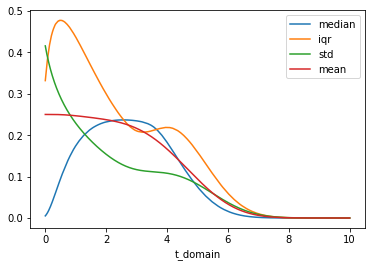

In [13]:
pdf_median = get_median(pdf_evol)
pdf_iqr = get_iqr(pdf_evol)
pdf_std = get_std(pdf_evol)
pdf_mean = get_mean(pdf_evol)

import seaborn as sns
import pandas as pd
t_domain = np.arange(0, T_dur+dt, dt)
data = {
    't_domain': t_domain,
    'median': pdf_median,
    'iqr': pdf_iqr,
    'std': pdf_std,
    'mean': pdf_mean
}

data_df = pd.DataFrame(data)
print(data_df.head())
data_df.set_index('t_domain').plot()

# Get drift from data

We will be using [Simulating Stock Prices in Python using Geometric Brownian motion](https://towardsdatascience.com/simulating-stock-prices-in-python-using-geometric-brownian-motion-8dfd6e8c6b18) as reference.

Content:
1. What GBM does
2. What input parameters we need for GBM simulation
3. The components of GBM: Drift and Diffusion
4. Building the discrete-time GBM model
5. Making predictions

```
# Parameter Definitions

# So    :   initial stock price
# dt    :   time increment -> a day in our case
# T     :   length of the prediction time horizon(how many time points to predict, same unit with dt(days))
# N     :   number of time points in the prediction time horizon -> T/dt
# t     :   array for time points in the prediction time horizon [1, 2, 3, .. , N]
# mu    :   mean of historical daily returns
# sigma :   standard deviation of historical daily returns
# b     :   array for brownian increments
# W     :   array for brownian path
```

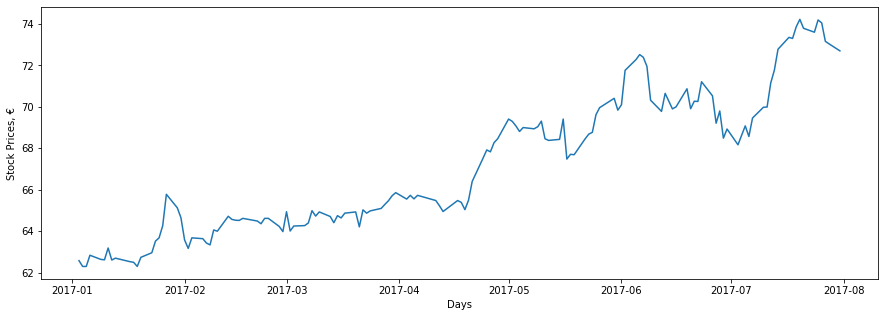

In [11]:
# 1. What GBM does
import pandas as pd
import numpy as np
import quandl
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Plot of E.ON(a big scale energy company in Europe) 
# stock prices since beginning of 2019 (up to July)

prices = quandl.get("EOD/MSFT", 
                authtoken="pNHLvptFyzyj8UHDrces", 
                start_date = '2016-01-01', end_date = '2016-07-31'
                ).reset_index(drop = False)[['Date', 'Close']]
# prices               
plt.figure(figsize = (15, 5))
plt.plot(prices['Date'], prices['Close'])
plt.xlabel('Days')
plt.ylabel('Stock Prices, €')
plt.show()



In [ ]:
# 2. What input parameters we need for GBM simulation
start_date = '2016-07-01'
end_date = '2016-07-31'
pred_end_date = '2016-08-31'

# We get daily closing stock prices of E.ON for July 2019
S_eon = quandl.get("FSE/EON_X", 
               authtoken="your_authorization_token", 
               start_date = start_date, end_date = end_date
               ).reset_index(drop = False)[['Date', 'Close']]
               
print(S_eon.head())
print(S_eon.tail())

# 1. So: This is the initial stock price.
So = S_eon.loc[S_eon.shape[0] - 1, "Close"]
print(So)

# 2. dt: This is the time increment in our model.
# Please note that dt follows from the time steps in historical data. If the stock 
# price data is published every 7.2 hours, then dt would be 0.3 since it corresponds to 7.2 hours(= 0.3 days).
dt = 1
print(dt)

# 3. T: T denotes the length of our prediction time horizon.
